In [83]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [ ]:
api_key="YOUR_API_KEY"
#channel_id='UCI38wx-TpExI5MeKZ-Io6kQ'
channel_ids=['UCI38wx-TpExI5MeKZ-Io6kQ',
             'UCnz-ZXXER4jOvuED5trXfEA',
            'UCiT9RITQ9PW6BhXK0y2jaeg',
             'UC2UXDak6o7rBm23k3Vv5dww',
             'UCLLw7jmFsvfIVaUFsLs8mlQ'
            ]
youtube=build('youtube','v3',developerKey=api_key)

function to get channel statstics

In [85]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()
    for i in range(len(response['items'])):
        data = dict(
            Channel_name=response['items'][i]['snippet']['title'],
            Subscribers=response['items'][i]['statistics']['subscriberCount'],
            Views=response['items'][i]['statistics']['viewCount'],
            Total_videos=response['items'][i]['statistics']['videoCount'],
            playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
        )
        all_data.append(data)
    
    return all_data


In [86]:
channel_statistics=get_channel_stats(youtube,channel_ids)

In [87]:
channel_data=pd.DataFrame(channel_statistics)

In [88]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,techTFQ,315000,17458591,137,UUnz-ZXXER4jOvuED5trXfEA
1,Tina Huang,670000,31953845,230,UU2UXDak6o7rBm23k3Vv5dww
2,Luke Barousse,456000,22657359,158,UULLw7jmFsvfIVaUFsLs8mlQ
3,Ken Jee,261000,9070280,287,UUiT9RITQ9PW6BhXK0y2jaeg
4,Alna Elsa Tom,0,0,0,UUI38wx-TpExI5MeKZ-Io6kQ


In [89]:
channel_data['Subscribers']=pd.to_numeric(channel_data['Subscribers'])
channel_data['Views']=pd.to_numeric(channel_data['Views'])
channel_data['Total_videos']=pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

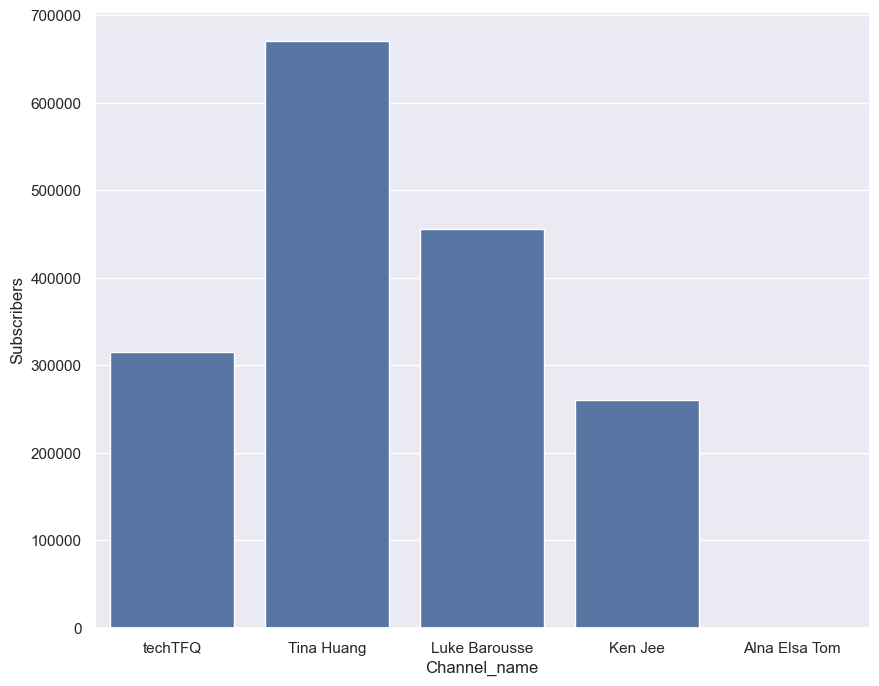

In [90]:
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

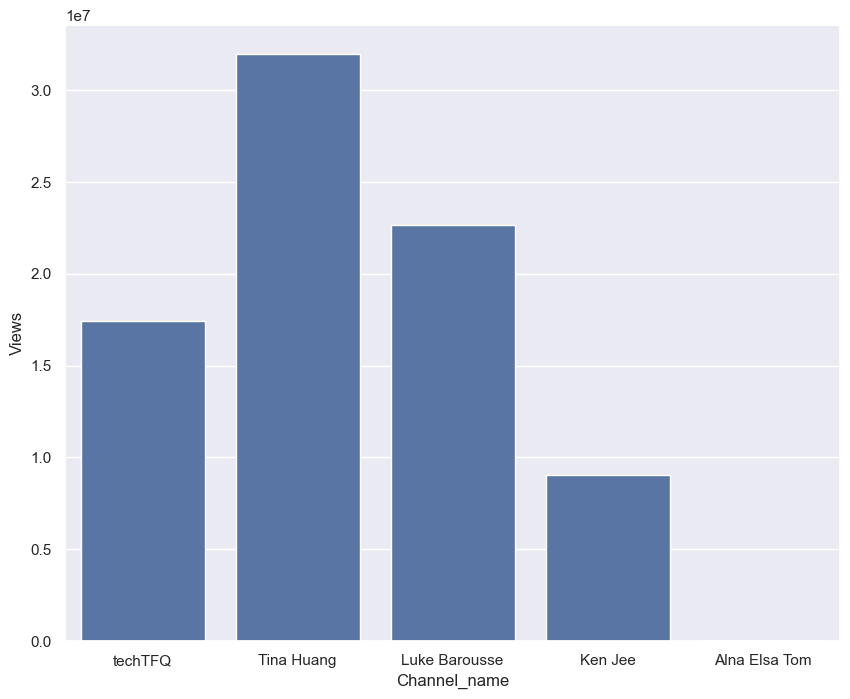

In [91]:
ax=sns.barplot(x='Channel_name',y='Views',data=channel_data)

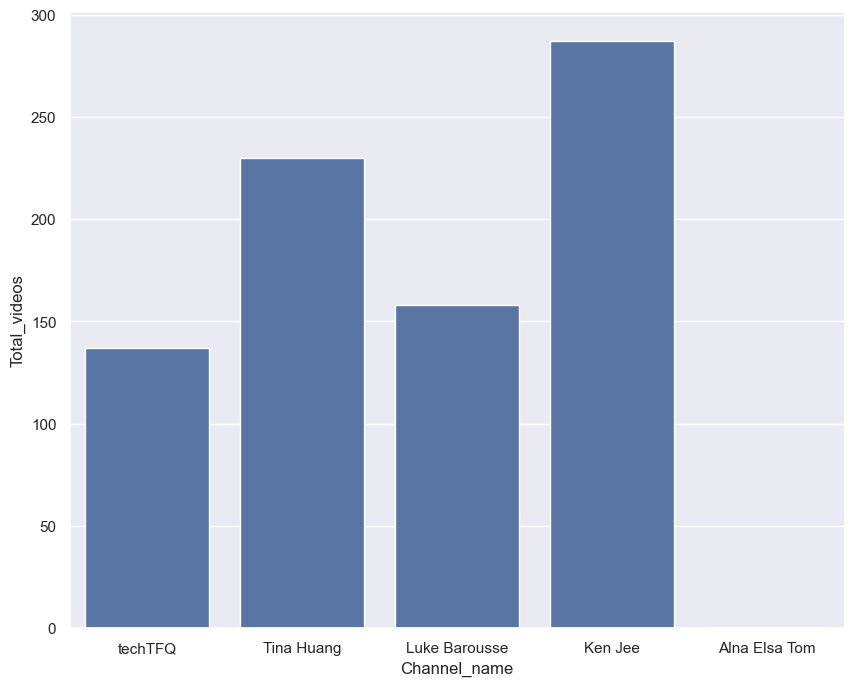

In [92]:
ax=sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

function to get video ids

In [93]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,techTFQ,315000,17458591,137,UUnz-ZXXER4jOvuED5trXfEA
1,Tina Huang,670000,31953845,230,UU2UXDak6o7rBm23k3Vv5dww
2,Luke Barousse,456000,22657359,158,UULLw7jmFsvfIVaUFsLs8mlQ
3,Ken Jee,261000,9070280,287,UUiT9RITQ9PW6BhXK0y2jaeg
4,Alna Elsa Tom,0,0,0,UUI38wx-TpExI5MeKZ-Io6kQ


In [94]:
playlist_id=channel_data.loc[channel_data['Channel_name']=='Ken Jee','playlist_id'].iloc[0]

In [107]:
def get_video_ids(youtube, playlist_id):
    video_ids = []
    request = youtube.playlistItems().list(
        part='contentDetails',
        playlistId=playlist_id,
        maxResults=50
    )
    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    while next_page_token:
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')

    return video_ids


In [108]:
video_ids=get_video_ids(youtube,playlist_id)

In [109]:
video_ids

['QEDZaBMozIo',
 'Hyhfa7z0jTk',
 'L5Cis5bOwgw',
 'M1I5HlzQges',
 'T_-0l0ORi5I',
 'w13zJB_jyBI',
 'oZ9rMrqyTbI',
 '6BrYKdqq4uA',
 '1dAvbIMrLos',
 'lqYxmYMkfK8',
 '-JTU734oMfk',
 'HVpbmu7rFYE',
 'NQQ3DRdXAXE',
 'xpi-M2j3NmE',
 'X07w7QFoLpc',
 'RRnThAtKuq0',
 'r3zOpjEOkgE',
 's-XYFEzy9Wc',
 'iBh1wl4o6V4',
 'L6lXKdP4Qbg',
 'xGDl6rlBygU',
 'SY6y6Y8C594',
 '1RUj2aLQx8I',
 'MkzZXSw1Glk',
 '9neDFXTxKxA',
 'UaNNVukM27g',
 '3lN0-S3symM',
 'M-AN8eWLxms',
 'MXFZhbvQqM8',
 '54n61XjKifI',
 'pyWYIRR8rrE',
 'onwRfbt--cw',
 'u6P23ouSYhA',
 'RMMVuvS7S_g',
 '5AwbPAV8FS0',
 'A2OQgU0IRNo',
 'x5Q_nrIqFik',
 '7ja2ELBVMlU',
 'Z2MyLQa_vVw',
 'JTlB9fwYRk0',
 'OJDf_fTENJ4',
 'nqCkdqhV-JY',
 'b8t8lDL13sg',
 't6CD1EwU5kc',
 'eIxHe45hzhQ',
 '3NJOWWvNK3I',
 '4_VtMWJSo1o',
 'OybXWl3IWvI',
 'nRHPQ5ZeB5Y',
 '0JWC4M0Qhqc',
 'oNvyvYGw5n4',
 'GaZRuchRCyw',
 'EBjYqC3aNTA',
 'QMP858aZcow',
 '0ItYIoOrrUs',
 'KzTFoUbThvM',
 'bBJd0oPdNak',
 'Yk-unX4KnV4',
 'z0_xrtFdFj8',
 'vVpkXEIn-q0',
 'aipz4p7GDL4',
 'iPdO9MwdcLE',
 'YPph59

function to get video details

In [120]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part='snippet,statistics',
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()
        for video in response['items']:
            video_stats = dict(
                Title=video['snippet']['title'],
                Published_date=video['snippet']['publishedAt'],
                Views=video['statistics'].get('viewCount', 0),
                Likes=video['statistics'].get('likeCount', 0),
                Dislikes=video['statistics'].get('dislikeCount', 0),
                Comments=video['statistics'].get('commentCount', 0)
            )
            all_video_stats.append(video_stats)
    return all_video_stats


In [122]:
video_details=get_video_details(youtube,video_ids)

In [123]:
video_data=pd.DataFrame(video_details)

In [126]:
video_data['Published_date']=pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views']=pd.to_numeric(video_data['Views'])
video_data['Likes']=pd.to_numeric(video_data['Likes'])
video_data['Dislikes']=pd.to_numeric(video_data['Dislikes'])
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,Moving On,2024-04-22,9223,425,0,90
1,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,2888,75,0,24
2,A Data Dream Come True,2023-11-17,2335,95,0,23
3,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,6283,413,0,77
4,How to Survive a Down Data Job Market,2023-09-05,17441,576,0,63
...,...,...,...,...,...,...
282,How to Simulate NBA Games in Python,2018-11-19,18734,409,0,50
283,Should You Get A Masters in Data Science?,2018-11-14,20820,302,0,135
284,How I Became A Data Scientist From a Business ...,2018-11-12,6589,197,0,23
285,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9206,192,0,17


In [129]:
top10_videos=video_data.sort_values(by='Views',ascending=False).head(10)

In [130]:
top10_videos

,Title,Published_date,Views,Likes,Dislikes,Comments
189,How I Would Learn Data Science (If I Had to St...,2020-05-08,1402179,48891,0,1987
165,Beginner Kaggle Data Science Project Walk-Thro...,2020-07-17,379497,8110,0,444
210,The Best Free Data Science Courses Nobody is T...,2020-03-09,350638,21222,0,621
69,How I Would Learn Data Science in 2022 (If I H...,2021-12-27,345568,15001,0,531
216,3 Proven Data Science Projects for Beginners (...,2020-02-17,334795,17972,0,527
202,Data Science Project from Scratch - Part 1 (Pr...,2020-04-03,212852,5276,0,173
255,The Projects You Should Do To Get A Data Scien...,2019-07-30,155177,5765,0,251
215,How to Set Up Your Data Science Environment (A...,2020-02-21,141613,2605,0,97
186,How to Make A Data Science Portfolio Website w...,2020-05-15,140463,4604,0,194
102,Why You Probably Won't Become a Data Scientist,2021-04-09,139343,4033,0,474


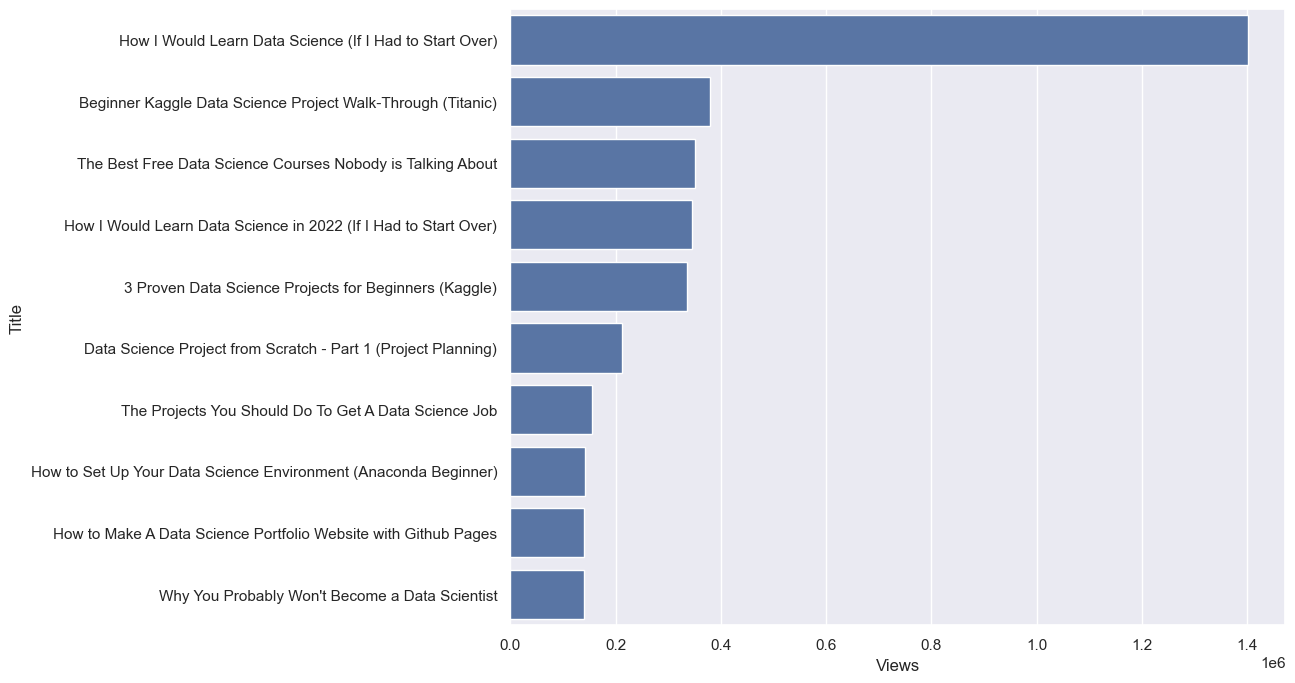

In [131]:
ax1=sns.barplot(x='Views',y='Title',data=top10_videos)

In [132]:
video_data

,Title,Published_date,Views,Likes,Dislikes,Comments
0,Moving On,2024-04-22,9223,425,0,90
1,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,2888,75,0,24
2,A Data Dream Come True,2023-11-17,2335,95,0,23
3,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,6283,413,0,77
4,How to Survive a Down Data Job Market,2023-09-05,17441,576,0,63
...,...,...,...,...,...,...
282,How to Simulate NBA Games in Python,2018-11-19,18734,409,0,50
283,Should You Get A Masters in Data Science?,2018-11-14,20820,302,0,135
284,How I Became A Data Scientist From a Business ...,2018-11-12,6589,197,0,23
285,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9206,192,0,17


In [134]:
video_data['Month']=pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [135]:
video_data


,Title,Published_date,Views,Likes,Dislikes,Comments,Month
0,Moving On,2024-04-22,9223,425,0,90,Apr
1,How Does ChatGPT Image Analysis Do on an IQ Test?,2023-11-30,2888,75,0,24,Nov
2,A Data Dream Come True,2023-11-17,2335,95,0,23,Nov
3,The Death of the Full-Time Job (Rise of the Co...,2023-09-22,6283,413,0,77,Sep
4,How to Survive a Down Data Job Market,2023-09-05,17441,576,0,63,Sep
...,...,...,...,...,...,...,...
282,How to Simulate NBA Games in Python,2018-11-19,18734,409,0,50,Nov
283,Should You Get A Masters in Data Science?,2018-11-14,20820,302,0,135,Nov
284,How I Became A Data Scientist From a Business ...,2018-11-12,6589,197,0,23,Nov
285,Predicting Season Long NBA Wins Using Multiple...,2018-07-10,9206,192,0,17,Jul


In [138]:
videos_per_month=video_data.groupby('Month',as_index=False).size()

In [139]:
videos_per_month

,Month,size
0,Apr,23
1,Aug,27
2,Dec,20
3,Feb,25
4,Jan,29
5,Jul,27
6,Jun,20
7,Mar,32
8,May,24
9,Nov,22


In [140]:
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [141]:
videos_per_month.index=pd.CategoricalIndex(videos_per_month['Month'],categories=sort_order,ordered=True)

In [142]:
videos_per_month.sort_index()

,Month,size
Month,,
Jan,Jan,29
Feb,Feb,25
Mar,Mar,32
Apr,Apr,23
May,May,24
Jun,Jun,20
Jul,Jul,27
Aug,Aug,27
Sep,Sep,21


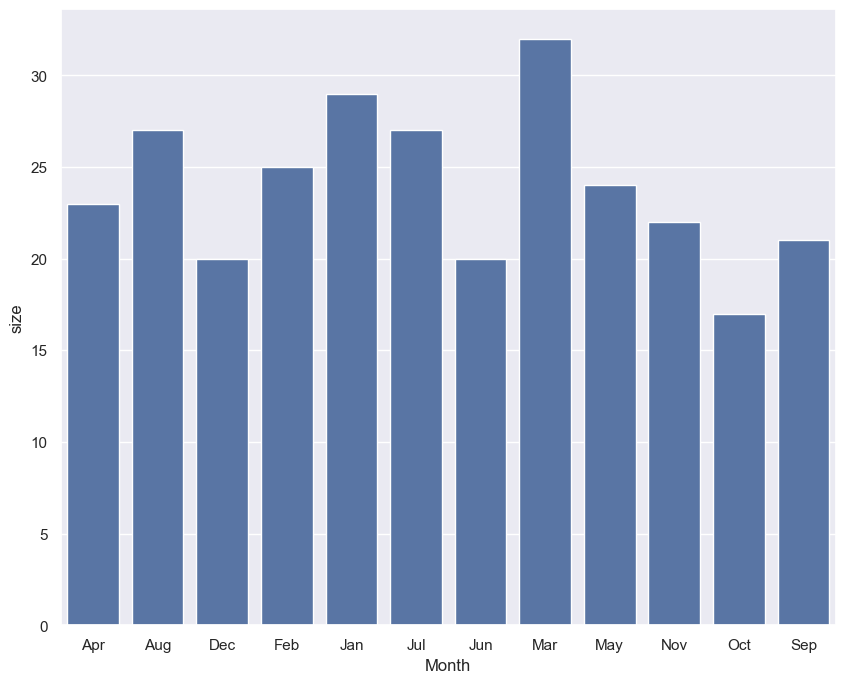

In [143]:
ax2=sns.barplot(x='Month',y='size',data=videos_per_month)

In [144]:
video_data.to_csv('Video_Deetails(Ken Jee).csv')